In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


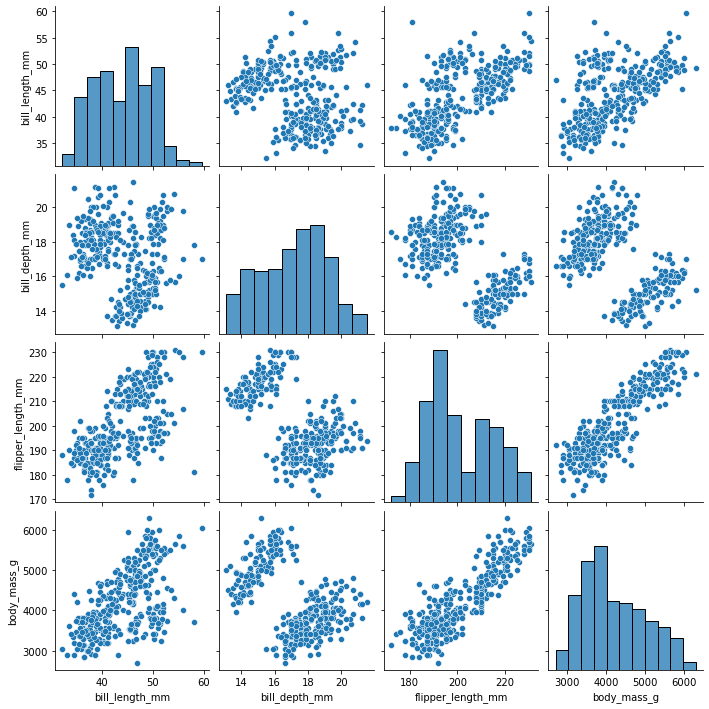

In [2]:
sns.pairplot(penguins)

Ik zie op de meeste plekken twee grote clusters, en soms een extra cluster tussendoor. Hierdoor verwacht ik dat er drie clusters zijn.

In [3]:
features = ['body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])
penguins['cluster'] = km.predict(penguins[features])

In [4]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6311263474530514

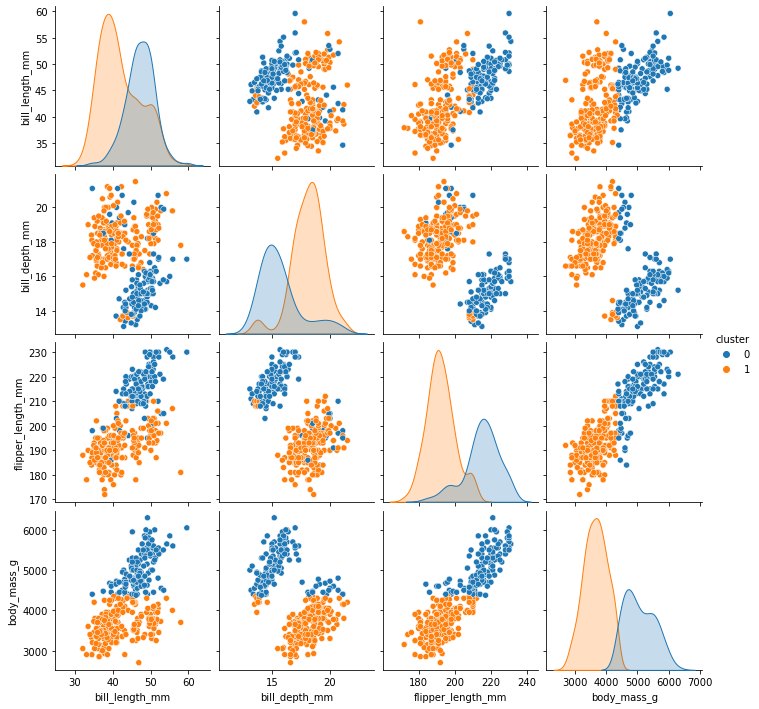

In [5]:
sns.pairplot(penguins, hue="cluster")

In [6]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,14,132
Chinstrap,5,63
Gentoo,111,8


Je ziet dat er eigenlijk drie species zijn ipv de twee die ik had voorspeld. Vooral de chinstraps en adelies zijn samengevoegd onder 1 cluster. Dit betekent dat hun values op elkaar lijken. (In dit geval de body mass)